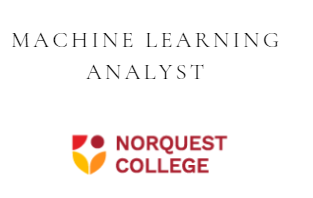

# Food Drive Sample App

1. Load your cleaned dataset for EDA

2. Upload your Cleaned Location dataset for Map generation

3. Upload Norquest Logo for your Dashboard. (You can include Edmonton City, and LDS Logos )

4. Carry out EDA & ML Modelling.

5. PKL your best performing model. (Download a copy of this too)

6. Edit the Web App File code below

7. Deploy your App on the Local Tunnel.

8. Deploy your App Publicly (Github,Streamlit)

9. Record a Navigation of your app's functionalities to avoid hassles on Demo Day

10. Complete your Slides


In [1]:
#install streamlit, one time execution
!pip install streamlit joblib

In [2]:
#import streamlit
import streamlit as st

In [3]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
import joblib

# Load the dataset with a specified encoding
data = pd.read_csv('clean_data.csv', encoding='latin1')

# Page 1: Dashboard
def dashboard():
    st.image('LOGO.jpg', use_column_width=True)

    st.subheader("💡 Abstract:")

    inspiration = '''
    Edmonton Food Drive Project
A collaborative effort to combat food insecurity in Edmonton, Alberta.

This project aims to build a web application and mobile app to connect individuals, businesses, and organizations involved in food drives across Edmonton. By centralizing information and streamlining processes, we hope to:

Increase awareness and participation in food drives, attracting both donors and volunteers.
Optimize logistics and resource allocation by providing a platform for transparent communication and coordination.
Make donating and volunteering easier and more accessible through user-friendly interfaces and tools.
    '''

    st.write(inspiration)

    st.subheader("👨🏻‍💻 What our Project Does?")

    what_it_does = '''
    This project aims to address food insecurity in Edmonton, Alberta, Canada. It focuses on the development and implementation of a sustainable food drive initiative that connects donors with community organizations supporting those in need. The project employs technology and innovative approaches to optimize efficiency, transparency, and impact.
    '''

    st.write(what_it_does)


# Page 2: Exploratory Data Analysis (EDA)
def exploratory_data_analysis():
    st.title("Exploratory Data Analysis")
    # Rename columns for clarity
    data_cleaned = data.rename(columns={
        'Timestamp': 'Date',
        'Drop Off Location': 'Location',
        'City': 'City',
        'Stake': 'Stake',
        'Route Number/Name': 'Route',
        '# of Adult Volunteers in this route': '# of Adult Volunteers',
        '# of Youth Volunteers in this route': '# of Youth Volunteers',
        '# of Donation Bags Collected/Route': 'Donation Bags Collected',
        'Time to Complete (in minutes) pick up of bags /route': 'Time to Complete (min)',
        'Did you complete more than 1 route?': 'Completed More Than One Route',
        'Number of routes completed': 'Routes Completed',
        '# of Doors in Route': 'Doors in Route'
    })

    # Visualize the distribution of numerical features using Plotly
    fig = px.histogram(data_cleaned, x='# of Adult Volunteers', nbins=20, labels={'# of Adult Volunteers': 'Adult Volunteers'})
    st.plotly_chart(fig)

    fig = px.histogram(data_cleaned, x='# of Youth Volunteers', nbins=20, labels={'# of Youth Volunteers': 'Youth Volunteers'})
    st.plotly_chart(fig)

    fig = px.histogram(data_cleaned, x='Donation Bags Collected', nbins=20, labels={'Donation Bags Collected': 'Donation Bags Collected'})
    st.plotly_chart(fig)

    fig = px.histogram(data_cleaned, x='Time to Complete (min)', nbins=20, labels={'Time to Complete (min)': 'Time to Complete'})
    st.plotly_chart(fig)

# Page 3: Machine Learning Modeling
def machine_learning_modeling():
    st.title("Machine Learning Modeling")
    st.write("Enter the details to predict donation bags:")

    # Input fields for user to enter data
    completed_routes = st.slider("Completed More Than One Route", 0, 1, 0)
    routes_completed = st.slider("Routes Completed", 1, 10, 5)
    time_spent = st.slider("Time Spent (minutes)", 10, 300, 60)
    adult_volunteers = st.slider("Number of Adult Volunteers", 1, 50, 10)
    doors_in_route = st.slider("Number of Doors in Route", 10, 500, 100)
    youth_volunteers = st.slider("Number of Youth Volunteers", 1, 50, 10)

    # Predict button
    if st.button("Predict"):
        # Load the trained model
        model = joblib.load('random_forest_classifier_model.pkl')

        # Prepare input data for prediction
        input_data = [[completed_routes, routes_completed, time_spent, adult_volunteers, doors_in_route, youth_volunteers]]

        # Make prediction
        prediction = model.predict(input_data)

        # Display the prediction
        st.success(f"Predicted Donation Bags: {prediction[0]}")

        # You can add additional information or actions based on the prediction if needed
# Page 4: Neighbourhood Mapping
# Read geospatial data
geodata = pd.read_csv("merged_data.csv")

def neighbourhood_mapping():
    st.title("Neighbourhood Mapping")

    # Get user input for neighborhood
    user_neighbourhood = st.text_input("Enter the neighborhood:")

    # Check if user provided input
    if user_neighbourhood:
        # Filter the dataset based on the user input
        filtered_data = geodata[geodata['Neighbourhood'] == user_neighbourhood]

        # Check if the filtered data is empty, if so, return a message indicating no data found
        if filtered_data.empty:
            st.write("No data found for the specified neighborhood.")
        else:
            # Create the map using the filtered data
            fig = px.scatter_mapbox(filtered_data,
                                    lat='Latitude',
                                    lon='Longitude',
                                    hover_name='Neighbourhood',
                                    zoom=12)

            # Update map layout to use OpenStreetMap style
            fig.update_layout(mapbox_style='open-street-map')

            # Show the map
            st.plotly_chart(fig)
    else:
        st.write("Please enter a neighborhood to generate the map.")






# Page 5: Data Collection
def data_collection():
    st.title("Data Collection")
    st.write("Please fill out the Google form to contribute to our Food Drive!")
    google_form_url = "https://forms.gle/Sif2hH3zV5fG2Q7P8"#YOUR_GOOGLE_FORM_URL_HERE
    st.markdown(f"[Fill out the form]({google_form_url})")

# Main App Logic
def main():
    st.sidebar.title("Food Drive App")
    app_page = st.sidebar.radio("Select a Page", ["Dashboard", "EDA", "ML Modeling", "Neighbourhood Mapping", "Data Collection"])

    if app_page == "Dashboard":
        dashboard()
    elif app_page == "EDA":
        exploratory_data_analysis()
    elif app_page == "ML Modeling":
        machine_learning_modeling()
    elif app_page == "Neighbourhood Mapping":
        neighbourhood_mapping()
    elif app_page == "Data Collection":
        data_collection()

if __name__ == "__main__":
    main()


Overwriting app.py


## Install localtunnel

In [4]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.542s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


## Run streamlit in background

In [5]:
!streamlit run /content/app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.125.105.189


Copy this IP address.

## Expose the port 8501
Then just click in the `url` showed.

A `log.txt`file will be created.

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.221s
your url is: https://khaki-bobcats-camp.loca.lt


# Sample Deployed Page

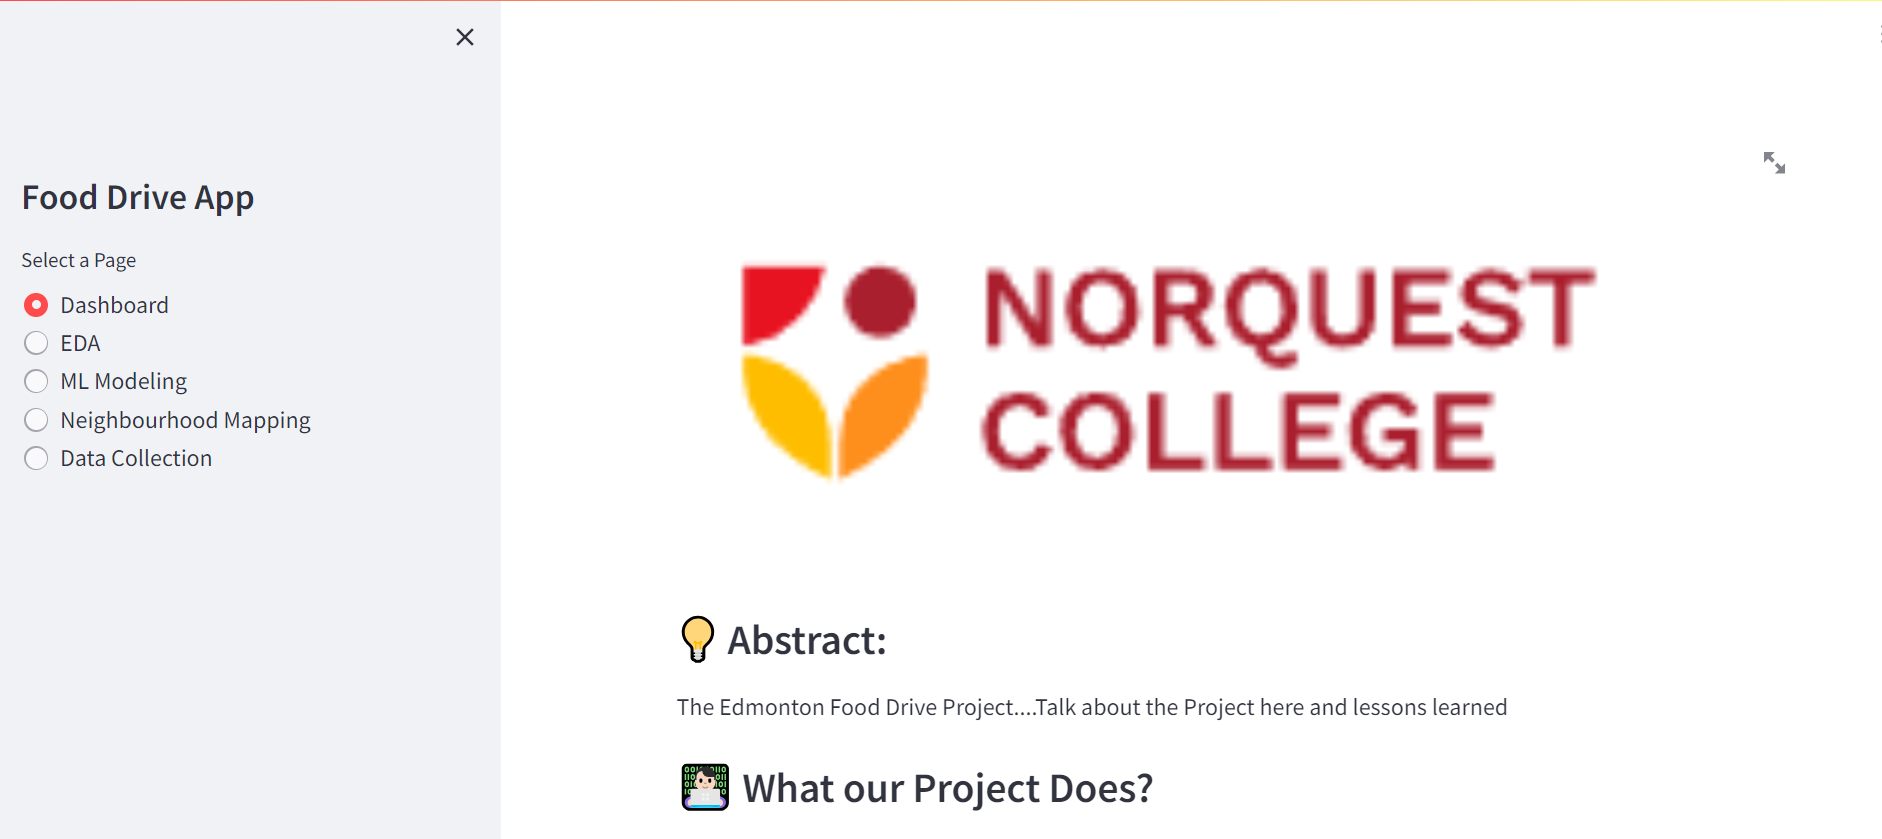

# Interview Readiness

1. Update your Map to show the Google Map -Edmonton Property Dataset

2. Update your Map to include your proposed Data Collection Form (Google Forms/Appsheet)

3. OPTIONAL - Include the chatbot. Ensure your API KEY is protected.


# Sample Chatbot Integration

Add your keys and uncomment the code below:

In [ ]:
!pip install gradientai --upgrade

In [ ]:
# import os
# os.environ['GRADIENT_ACCESS_TOKEN'] = "YOUR_TOKEN"
# os.environ['GRADIENT_WORKSPACE_ID'] = "YOUR_WORKSPACE_ID"

In [ ]:
%%writefile app.py
# Import necessary libraries
import streamlit as st
import os
import pandas as pd
import plotly.express as px
import joblib
from gradientai import Gradient

# Load the dataset with a specified encoding
data = pd.read_csv('Cleaned Proposed Data Collection.csv', encoding='latin1')

# Page 1: Dashboard
def dashboard():
    st.image('LOGO.jpg', use_column_width=True)

    st.subheader("💡 Abstract:")

    inspiration = '''
    A collaborative effort to combat food insecurity in Edmonton, Alberta.

This project aims to build a web application and mobile app to connect individuals, businesses, and organizations involved in food drives across Edmonton. By centralizing information and streamlining processes, we hope to:

Increase awareness and participation in food drives, attracting both donors and volunteers.
Optimize logistics and resource allocation by providing a platform for transparent communication and coordination.
Make donating and volunteering easier and more accessible through user-friendly interfaces and tools.
    '''

    st.write(inspiration)

    st.subheader("👨🏻‍💻 What our Project Does?")

    what_it_does = '''
    This project aims to address food insecurity in Edmonton, Alberta, Canada. It focuses on the development and implementation of a sustainable food drive initiative that connects donors with community organizations supporting those in need. The project employs technology and innovative approaches to optimize efficiency, transparency, and impact.
    '''

    st.write(what_it_does)


# Page 2: Exploratory Data Analysis (EDA)
def exploratory_data_analysis():
    st.title("Exploratory Data Analysis")
    # Rename columns for clarity
    data_cleaned = data.rename(columns={
        'Timestamp': 'Date',
        'Drop Off Location': 'Location',
        'City': 'City',
        'Stake': 'Stake',
        'Route Number/Name': 'Route',
        '# of Adult Volunteers in this route': '# of Adult Volunteers',
        '# of Youth Volunteers in this route': '# of Youth Volunteers',
        '# of Donation Bags Collected/Route': 'Donation Bags Collected',
        'Time to Complete (in minutes) pick up of bags /route': 'Time to Complete (min)',
        'Did you complete more than 1 route?': 'Completed More Than One Route',
        'Number of routes completed': 'Routes Completed',
        '# of Doors in Route': 'Doors in Route'
    })

    # Visualize the distribution of numerical features using Plotly
    fig = px.histogram(data_cleaned, x='# of Adult Volunteers', nbins=20, labels={'# of Adult Volunteers': 'Adult Volunteers'})
    st.plotly_chart(fig)

    fig = px.histogram(data_cleaned, x='# of Youth Volunteers', nbins=20, labels={'# of Youth Volunteers': 'Youth Volunteers'})
    st.plotly_chart(fig)

    fig = px.histogram(data_cleaned, x='Donation Bags Collected', nbins=20, labels={'Donation Bags Collected': 'Donation Bags Collected'})
    st.plotly_chart(fig)

    fig = px.histogram(data_cleaned, x='Time to Complete (min)', nbins=20, labels={'Time to Complete (min)': 'Time to Complete'})
    st.plotly_chart(fig)

# Page 3: Machine Learning Modeling
def machine_learning_modeling():
    st.title("Machine Learning Modeling")
    st.write("Enter the details to predict donation bags:")

    # Input fields for user to enter data
    completed_routes = st.slider("Completed More Than One Route", 0, 1, 0)
    routes_completed = st.slider("Routes Completed", 1, 10, 5)
    time_spent = st.slider("Time Spent (minutes)", 10, 300, 60)
    adult_volunteers = st.slider("Number of Adult Volunteers", 1, 50, 10)
    doors_in_route = st.slider("Number of Doors in Route", 10, 500, 100)
    youth_volunteers = st.slider("Number of Youth Volunteers", 1, 50, 10)

    # Predict button
    if st.button("Predict"):
        # Load the trained model
        model = joblib.load('random_forest_classifier_model.pkl')

        # Prepare input data for prediction
        input_data = [[completed_routes, routes_completed, time_spent, adult_volunteers, doors_in_route, youth_volunteers]]

        # Make prediction
        prediction = model.predict(input_data)

        # Display the prediction
        st.success(f"Predicted Donation Bags: {prediction[0]}")

        # You can add additional information or actions based on the prediction if needed
# Page 4: Neighbourhood Mapping
# Read geospatial data
geodata = pd.read_csv("merged_data.csv")

def neighbourhood_mapping():
    st.title("Neighbourhood Mapping")

    # Get user input for neighborhood
    user_neighbourhood = st.text_input("Enter the neighborhood:")

    # Check if user provided input
    if user_neighbourhood:
        # Filter the dataset based on the user input
        filtered_data = geodata[geodata['Neighbourhood'] == user_neighbourhood]

        # Check if the filtered data is empty, if so, return a message indicating no data found
        if filtered_data.empty:
            st.write("No data found for the specified neighborhood.")
        else:
            # Create the map using the filtered data
            fig = px.scatter_mapbox(filtered_data,
                                    lat='Latitude',
                                    lon='Longitude',
                                    hover_name='Neighbourhood',
                                    zoom=12)

            # Update map layout to use OpenStreetMap style
            fig.update_layout(mapbox_style='open-street-map')

            # Show the map
            st.plotly_chart(fig)
    else:
        st.write("Please enter a neighborhood to generate the map.")






# Page 5: Data Collection
def data_collection():
    st.title("Data Collection")
    st.write("Please fill out the Google form to contribute to our Food Drive!")
    google_form_url = "https://forms.gle/Sif2hH3zV5fG2Q7P8"#YOUR_GOOGLE_FORM_URL_HERE
    st.markdown(f"[Fill out the form]({google_form_url})")

# Page 6: Chatbot
def chatbot():
    st.title("Interactive Food Drive Assistant")
    st.write("Ask a question about the Food Drive!")

    with Gradient() as gradient:
        base_model = gradient.get_base_model(base_model_slug="nous-hermes2")
        new_model_adapter = base_model.create_model_adapter(name="interactive_food_drive_model")

        user_input = st.text_input("Ask your question:")
        if user_input and user_input.lower() not in ['quit', 'exit']:
            sample_query = f"### Instruction: {user_input} \n\n### Response:"
            st.markdown(f"Asking: {sample_query}")

            # before fine-tuning
            completion = new_model_adapter.complete(query=sample_query, max_generated_token_count=100).generated_output
            st.markdown(f"Generated: {completion}")

        # Delete the model adapter after generating the response
        new_model_adapter.delete()

# Main App Logic
def main():
    st.sidebar.title("Food Drive App")
    app_page = st.sidebar.radio("Select a Page", ["Dashboard", "EDA", "ML Modeling", "Neighbourhood Mapping", "Data Collection", "Chatbot"])

    if app_page == "Dashboard":
        dashboard()
    elif app_page == "EDA":
        exploratory_data_analysis()
    elif app_page == "ML Modeling":
        machine_learning_modeling()
    elif app_page == "Neighbourhood Mapping":
        neighbourhood_mapping()
    elif app_page == "Data Collection":
        data_collection()
    elif app_page == "Chatbot":
        chatbot()

if __name__ == "__main__":
    main()


# Generating the Requirements.txt file

In [ ]:
!pip install pipreqs

In [ ]:
!pipreqs #(to create a new requirements.txt file) Delete current file
#!pipreqs --force #(to replace existing requirements.txt file)

In [ ]:
# !pip freeze > requirements .txt

# Disconnect Runtime
To rerun Disconnect & Delete Runtime.

# Protecting your API KEY

To implement the streamlit secrets in your code, you need to do the following steps:

- Add your secrets in the TOML format to the Secrets field in the Advanced settings of your app deployment on share.streamlit.io. For example, you can add your Gradient access token and workspace ID as follows:

    # These will be available as environment variables
    GRADIENT_ACCESS_TOKEN = "YOUR_TOKEN"
    
    GRADIENT_WORKSPACE_ID = "YOUR_WORKSPACE_ID"

- Replace the hard-coded values of the environment variables with the st.secrets dict. For example, you can do this:

    # Import necessary libraries
    import streamlit as st

    import os
    # Set the environment variables from the st.secrets dict
    os.environ['GRADIENT_ACCESS_TOKEN'] = st.secrets["GRADIENT_ACCESS_TOKEN"]

    os.environ['GRADIENT_WORKSPACE_ID'] = st.secrets["GRADIENT_WORKSPACE_ID"]

    from gradientai import Gradient

    # The rest of your code ...

- Save and deploy your app. Your secrets will be securely stored and accessed by your app.


# References


1.https://www.youtube.com/watch?v=8M20LyCZDOY&list=PLtqF5YXg7GLmCvTswG32NqQypOuYkPRUE&index=2

2. https://github.com/dataprofessor/code/blob/master/streamlit/part2/iris-ml-app.py

3. https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/Create_streamlit_app.ipynb#scrollTo=IFvZnzS4vr88 for ngrok